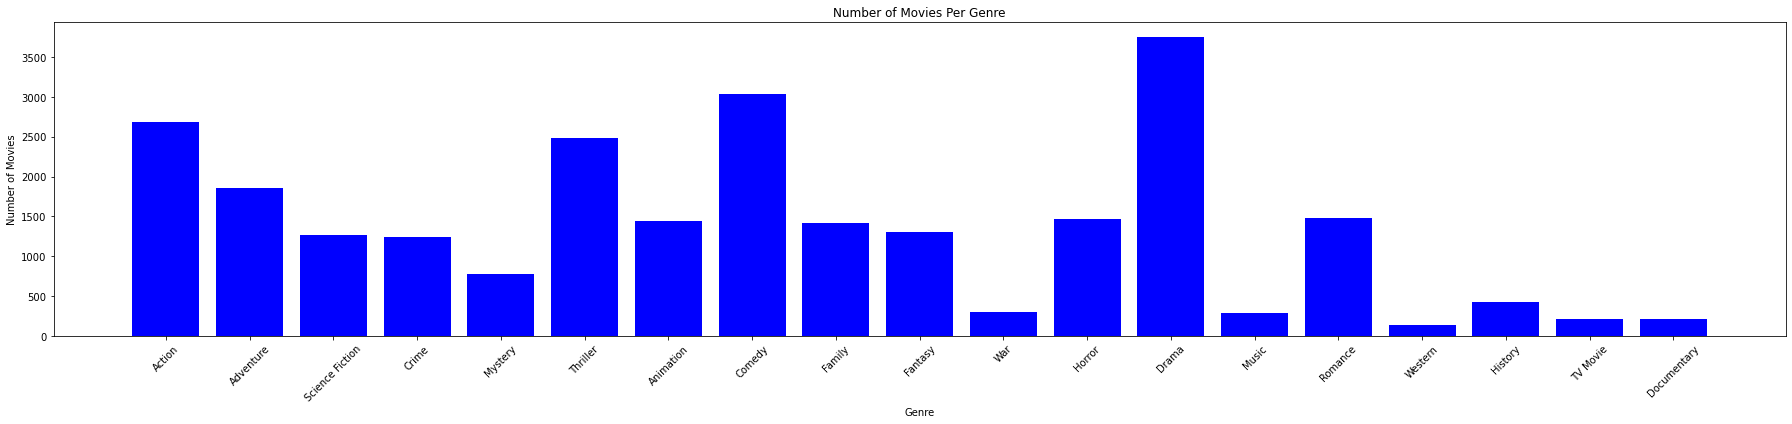

In [2]:
from pyspark import SparkConf, SparkContext
import csv
import matplotlib.pyplot as plt

if __name__ == "__main__":
    conf = SparkConf().setMaster("local").setAppName("IMDB")
    sc = SparkContext(conf=conf)
    
    #Predlog 4
    #Najzastupljeniji žanrovi. Da li postoji razlika po decenijama ili nekim drugim vremenskim periodima
    # Broj filmova po žanru, na osnovu grafika može se zaključiti koji su žanrovi najzastupljeniji
    
    mymoviedb = sc.textFile("mymoviedb.csv")
    header = mymoviedb.first()
    #print(header)
    
    dataWithoutHeader = mymoviedb.filter(lambda line: line != header)
    #print(dataFilter)
    
    # Extract year, popularity, and genres
    data = dataWithoutHeader.mapPartitions(lambda x: csv.reader(x)).map(lambda x: x[7])

    # Split genres and count the occurrences
    genre_counts = data.flatMap(lambda genres: genres.split(",")).map(lambda genre: (genre.strip(), 1)).reduceByKey(lambda a, b: a + b)
              
    output_path = "genre_counts_output"
    genre_counts.saveAsTextFile(output_path)

    # Collect the data to the driver
    collected_data = genre_counts.collect()
    
    # Extract years and counts
    genres = [entry[0] for entry in collected_data]
    counts = [entry[1] for entry in collected_data]
    
    
    # Plotting the data
    # figsize parameter specifies the dimensions (width and height) of the figure in inches
    plt.figure(figsize=(25, 6))
    plt.bar(genres, counts, color='blue')
    plt.xlabel('Genre')
    plt.ylabel('Number of Movies')
    plt.title('Number of Movies Per Genre')
    
    # used to customize the tick marks on the x-axis (years in this case).
    plt.xticks(rotation=45)
    # ensures that all elements of the plot are properly visible and spaced
    plt.tight_layout()
    
    # Save or show the plot
    plt.savefig("genre_counts.jpg")
    plt.show()
    
    # Stop the Spark context
    sc.stop()
